# Rotating Coild Data Analysis for SI Q20-Fam2-3 Magnets

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
# Define serial numbers, one for each magnet

serials = [
    '005', '007', '009', '010', '011', '012', '013', '014', '015', '016',
    '021', '022', '023', '026', '027', '028', '033', '034', '035', '036',
    '038', '039', '041', '044', '045', '048', '049', '051', '053', '055',
    '057', '061', '063', '065', '066', '068', '069', '071', '073', '074',
    '076', '077', '078', '080', '081', '082', '083', '086', '087', '088',
    '090', '091', '092', '094', '098', '102', '106', '115', '118', '120',
    '121', '123', '129', '131', '132', '133', '137', '141', '145', '146',
    '147', '152', '155', '168', '169', '172', '173', '174', '175', '177',
    '179', 
]

# Load all data
RotCoilMeas_SIQuadQ20.family_folder = 'family_2_and_3/'
data = MagnetsAnalysis(RotCoilMeas_SIQuadQ20, serials)
data.init()

# Print info
data.print_info()

index: 00, serial_number: 005, data sets: ['M1']
index: 01, serial_number: 007, data sets: ['M1_ferromag', 'M1']
index: 02, serial_number: 009, data sets: ['M1']
index: 03, serial_number: 010, data sets: ['M1']
index: 04, serial_number: 011, data sets: ['M1']
index: 05, serial_number: 012, data sets: ['M1']
index: 06, serial_number: 013, data sets: ['M1']
index: 07, serial_number: 014, data sets: ['M1']
index: 08, serial_number: 015, data sets: ['M1']
index: 09, serial_number: 016, data sets: ['M1']
index: 10, serial_number: 021, data sets: ['M1']
index: 11, serial_number: 022, data sets: ['M1']
index: 12, serial_number: 023, data sets: ['M1']
index: 13, serial_number: 026, data sets: ['M1']
index: 14, serial_number: 027, data sets: ['M1']
index: 15, serial_number: 028, data sets: ['M1']
index: 16, serial_number: 033, data sets: ['M1']
index: 17, serial_number: 034, data sets: ['M1']
index: 18, serial_number: 035, data sets: ['M1']
index: 19, serial_number: 036, data sets: ['M1']
index

## Maximum Integrated Quadrupole

In [3]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M1')

index:00, serial:005, idx:12, max_current:  +157.4380 [A], diff_spec: +0.22 [%]
index:01, serial:007, idx:12, max_current:  +157.4387 [A], diff_spec: +0.27 [%]
index:02, serial:009, idx:12, max_current:  +157.4382 [A], diff_spec: +0.16 [%]
index:03, serial:010, idx:12, max_current:  +157.4372 [A], diff_spec: +0.18 [%]
index:04, serial:011, idx:12, max_current:  +157.4380 [A], diff_spec: +0.12 [%]
index:05, serial:012, idx:12, max_current:  +157.4381 [A], diff_spec: +0.24 [%]
index:06, serial:013, idx:12, max_current:  +157.4373 [A], diff_spec: +0.19 [%]
index:07, serial:014, idx:12, max_current:  +157.4374 [A], diff_spec: +0.19 [%]
index:08, serial:015, idx:12, max_current:  +157.4377 [A], diff_spec: +0.14 [%]
index:09, serial:016, idx:12, max_current:  +157.4399 [A], diff_spec: +0.15 [%]
index:10, serial:021, idx:12, max_current:  +157.4403 [A], diff_spec: +0.11 [%]
index:11, serial:022, idx:12, max_current:  +157.4373 [A], diff_spec: +0.02 [%]
index:12, serial:023, idx:12, max_curren

<IPython.core.display.Javascript object>


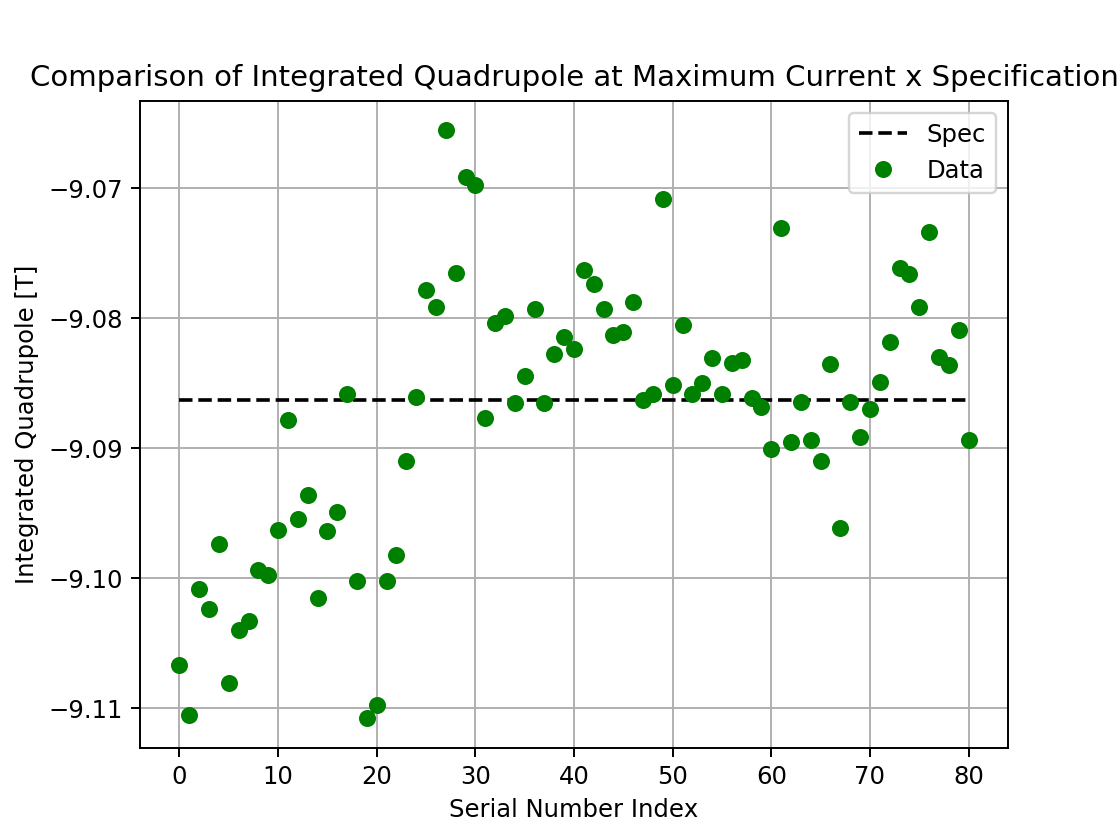

In [4]:
# plot data comparison with spec
plt.figure()
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


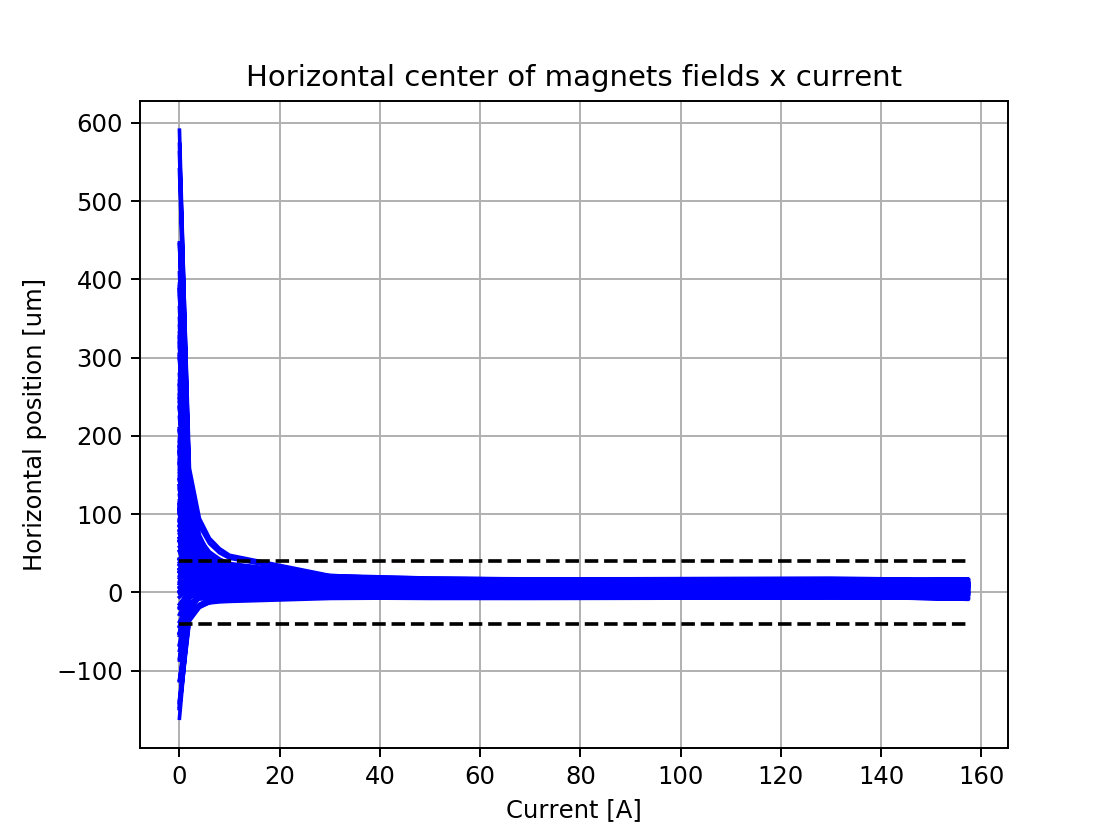

Horizontal center at maximum current [um]: +6.23 ± 5.93


<IPython.core.display.Javascript object>


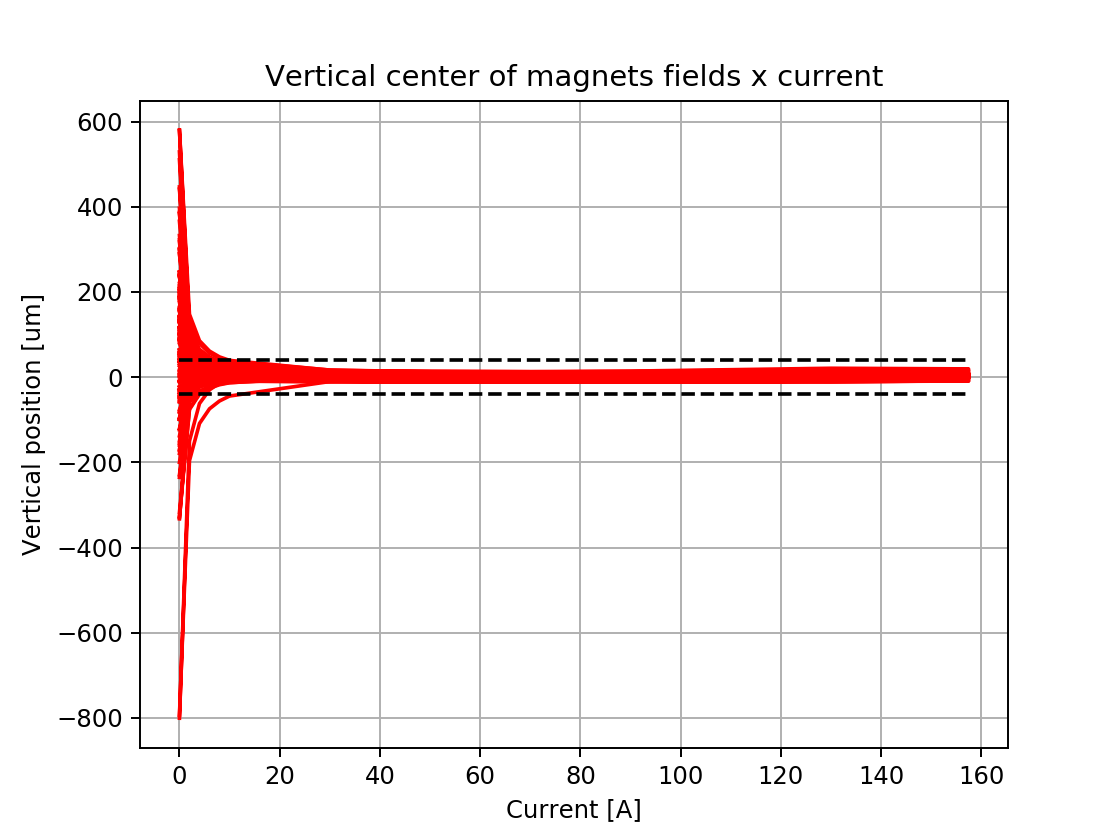

Vertical center at maximum current [um]: +3.42 ± 5.42


In [5]:
# Horizontal center for all magnets x currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'X', plt)
plt.show()

# Vertical center for all magnets y currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


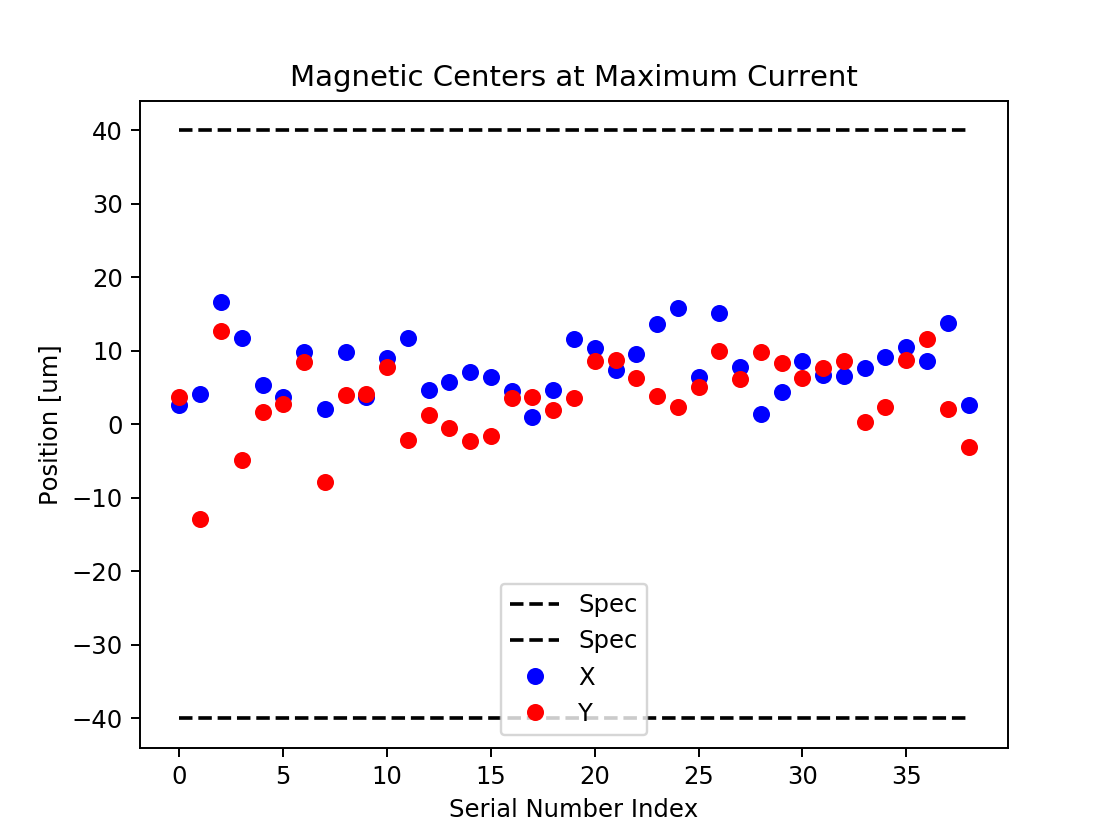

<IPython.core.display.Javascript object>


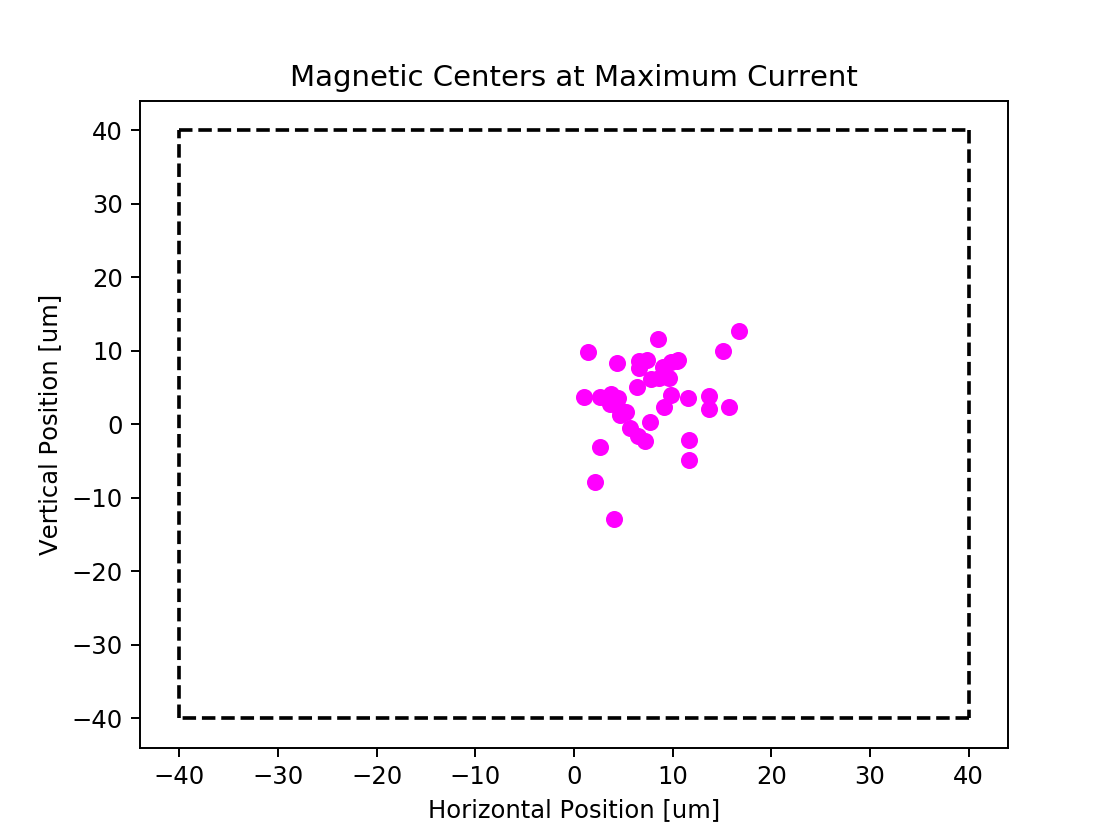

In [6]:
# Horizontal and vertical positions of all magnets
plt.figure()
data.magnetic_center_plot('M1', plt)
plt.show()

# Transverse plane positions
plt.figure()
data.magnetic_center_transverse_plot('M1', plt)
plt.show()

## Ramp Up

<IPython.core.display.Javascript object>


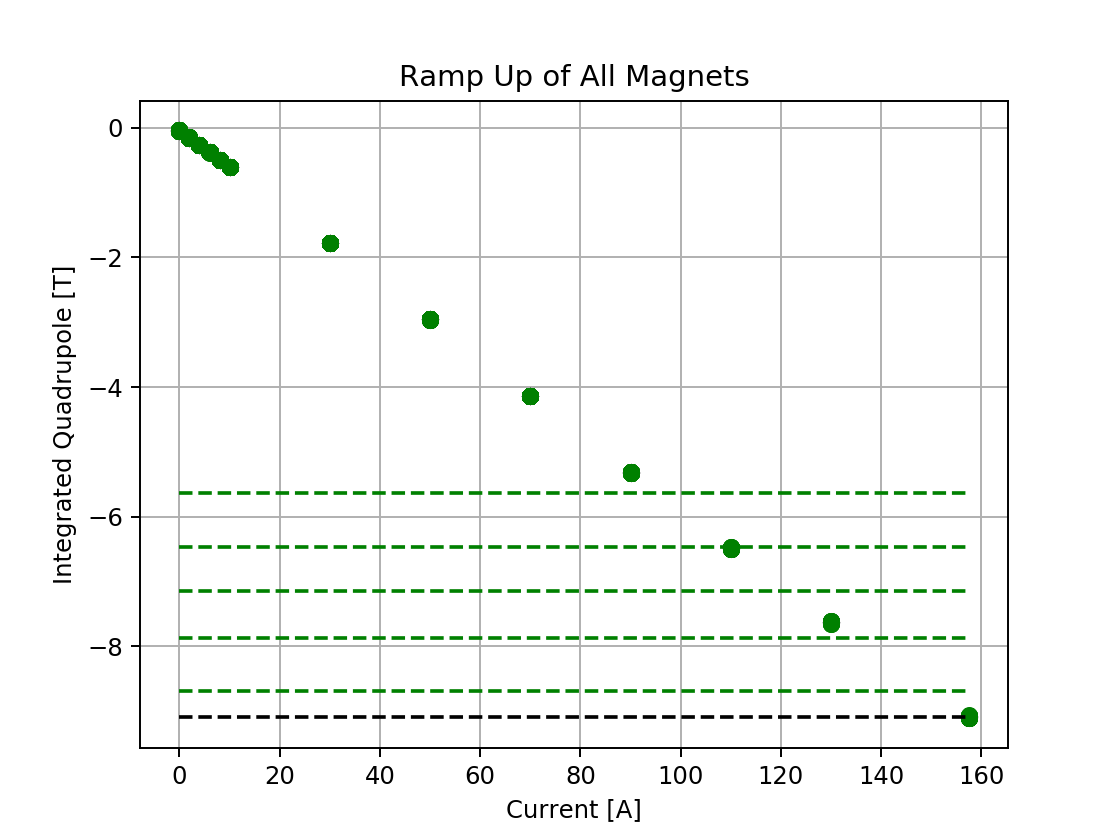

Nominal Integrated Quadrupole [T]:
SI-Fam:MA-QFA   : -7.151253
SI-Fam:MA-Q1    : -5.635511
SI-Fam:MA-Q2    : -8.690641
SI-Fam:MA-Q3    : -6.475734
SI-Fam:MA-Q4    : -7.873274

SI-Fam:MA-QFA  : 121.4 A
SI-Fam:MA-Q1   : 095.3 A
SI-Fam:MA-Q2   : 149.6 A
SI-Fam:MA-Q3   : 109.6 A
SI-Fam:MA-Q4   : 134.2 A


In [6]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

plt.figure()
data.rampup_excitation_curve_plot('M1', plt)
plt.show()

# Print currents for nominal strengths
print()
d = data.tmpl.get_nominal_main_intmpole_values(3.0)
for fam, gl in d.items():
    c = data.tmpl.rampup_main_mpole_2_curr('M1', gl)
    print('{:<15s}: {:05.1f} A'.format(fam, c))

<IPython.core.display.Javascript object>


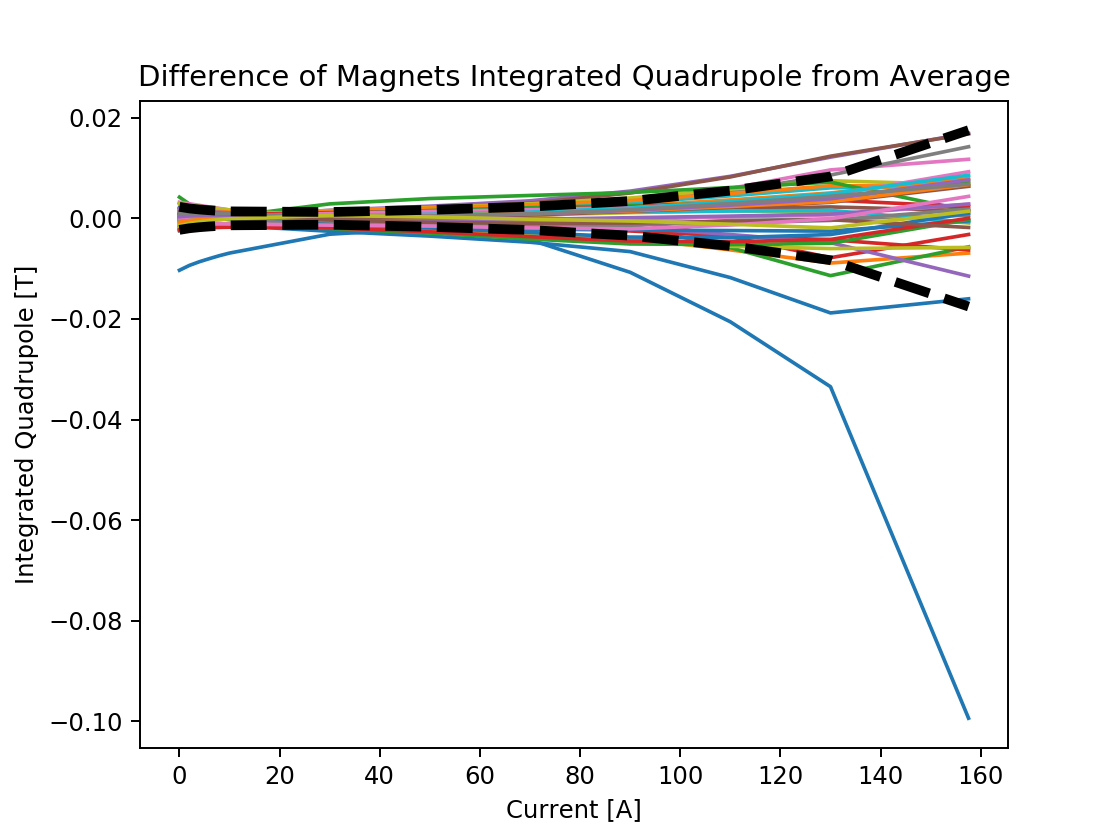

In [8]:
# Plot rampup dispersion amongst magnets

# Q20-099 is off.

plt.figure()
data.rampup_excitation_curve_dispersion_plot('M1', plt)
plt.show()

In [7]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M1')

current 00:   +0.001 [A], rms_error:  5.5768 [%], max_error: 14.0879 [%]
current 01:   +1.995 [A], rms_error:  1.1101 [%], max_error:  3.1882 [%]
current 02:   +3.998 [A], rms_error:  0.5113 [%], max_error:  1.5661 [%]
current 03:   +5.997 [A], rms_error:  0.2982 [%], max_error:  0.9909 [%]
current 04:   +7.996 [A], rms_error:  0.1973 [%], max_error:  0.8099 [%]
current 05:   +9.996 [A], rms_error:  0.1430 [%], max_error:  0.6906 [%]
current 06:  +29.996 [A], rms_error:  0.0701 [%], max_error:  0.2299 [%]
current 07:  +49.994 [A], rms_error:  0.0585 [%], max_error:  0.1383 [%]
current 08:  +69.995 [A], rms_error:  0.0562 [%], max_error:  0.1406 [%]
current 09:  +89.998 [A], rms_error:  0.0649 [%], max_error:  0.1660 [%]
current 10: +109.997 [A], rms_error:  0.0916 [%], max_error:  0.2086 [%]
current 11: +129.996 [A], rms_error:  0.1233 [%], max_error:  0.2768 [%]
current 12: +157.438 [A], rms_error:  0.1103 [%], max_error:  0.2567 [%]


<IPython.core.display.Javascript object>


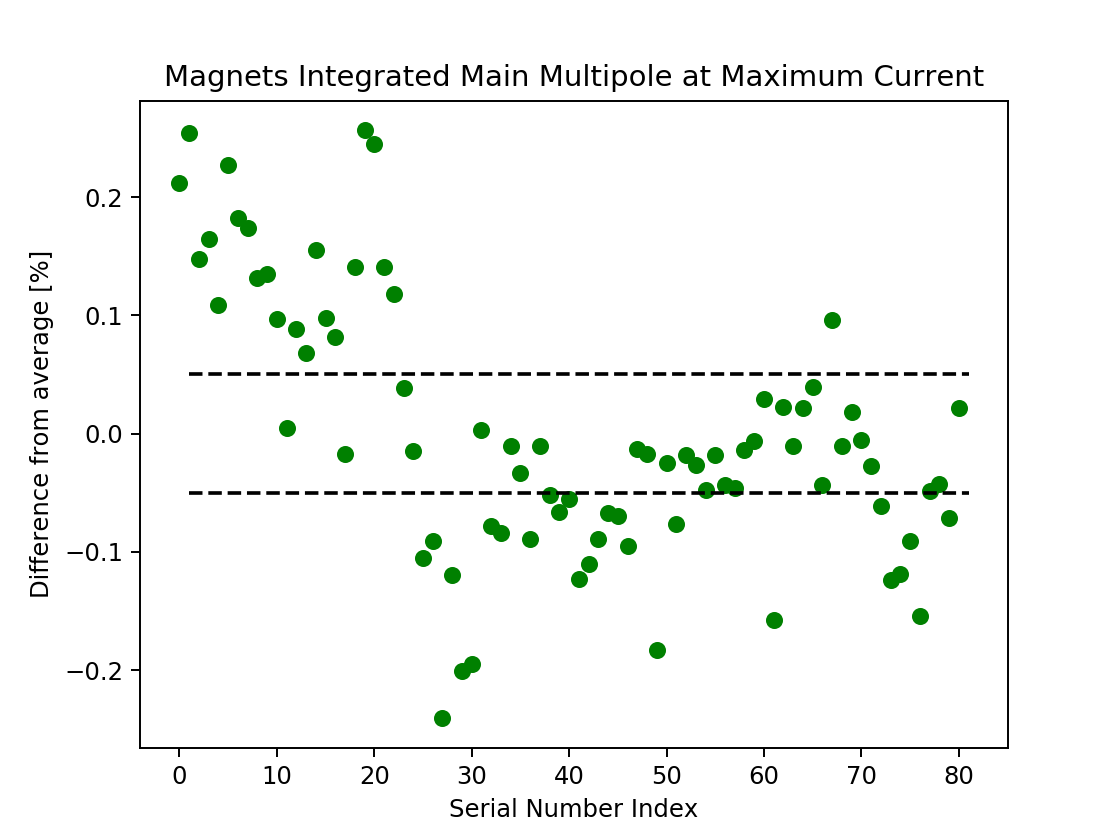

In [8]:
# Plot Integrated Quadrupole Error for maximum current

plt.figure()
data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

# Gradient Roll Error

<IPython.core.display.Javascript object>


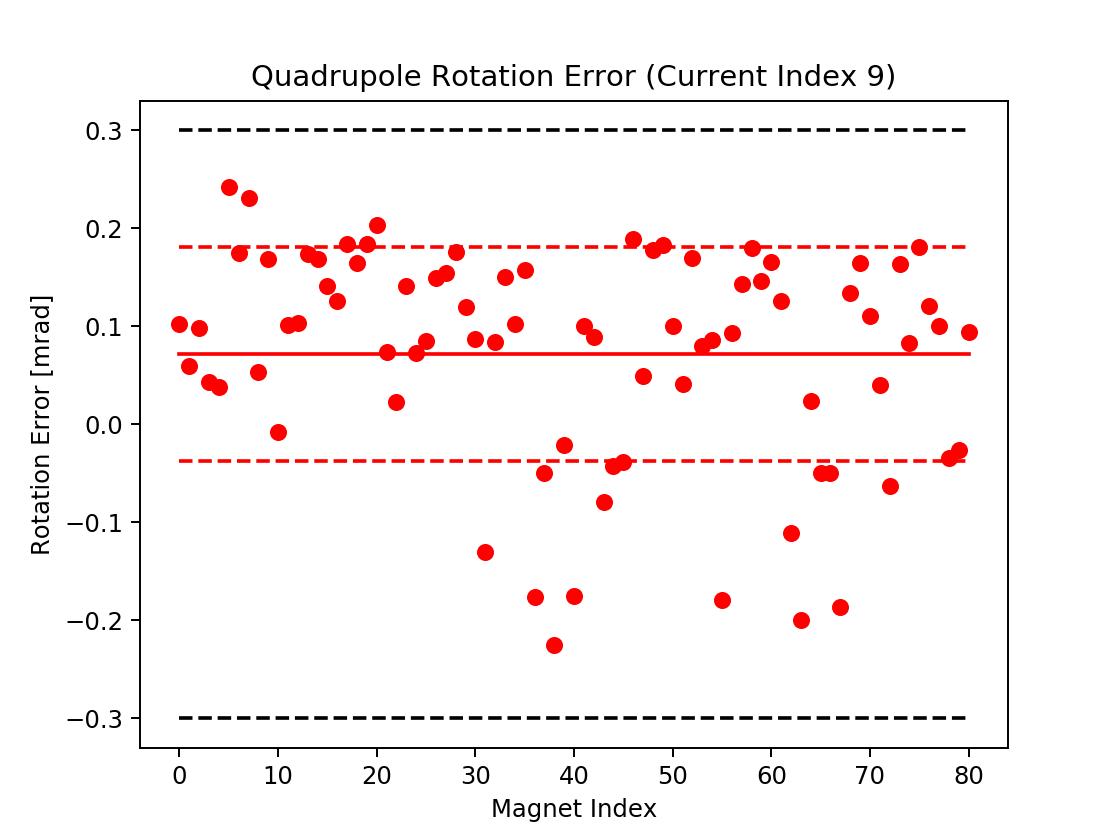

Angle error (Spec): +0.300 mrad
Angle error (Avg) : +0.072 mrad
Angle error (Std) : +0.109 mrad


<IPython.core.display.Javascript object>


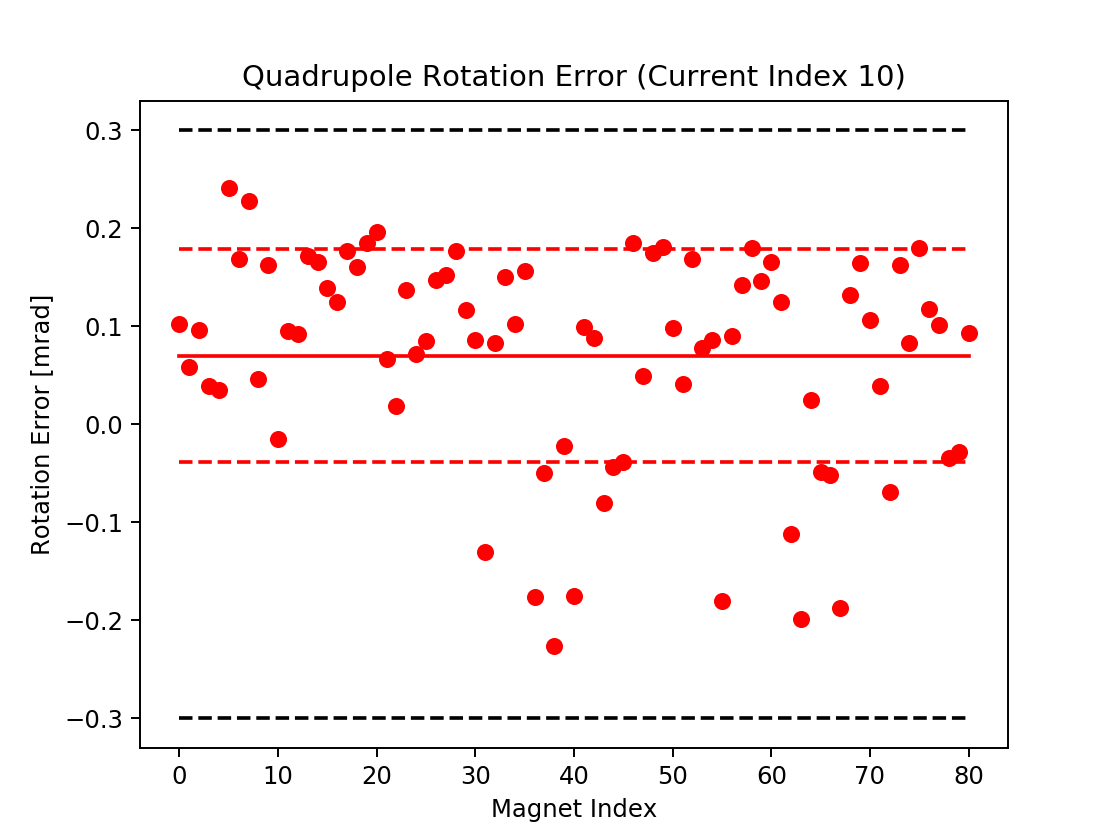

Angle error (Spec): +0.300 mrad
Angle error (Avg) : +0.070 mrad
Angle error (Std) : +0.109 mrad


<IPython.core.display.Javascript object>


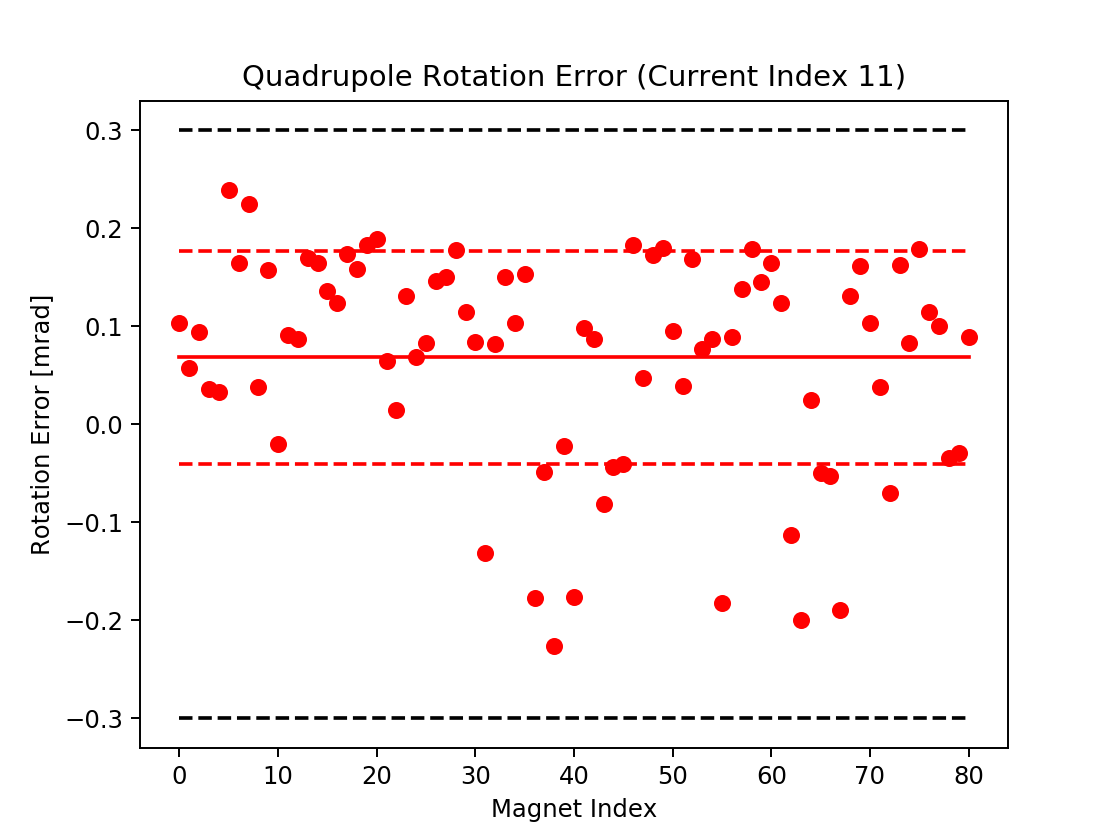

Angle error (Spec): +0.300 mrad
Angle error (Avg) : +0.068 mrad
Angle error (Std) : +0.109 mrad


<IPython.core.display.Javascript object>


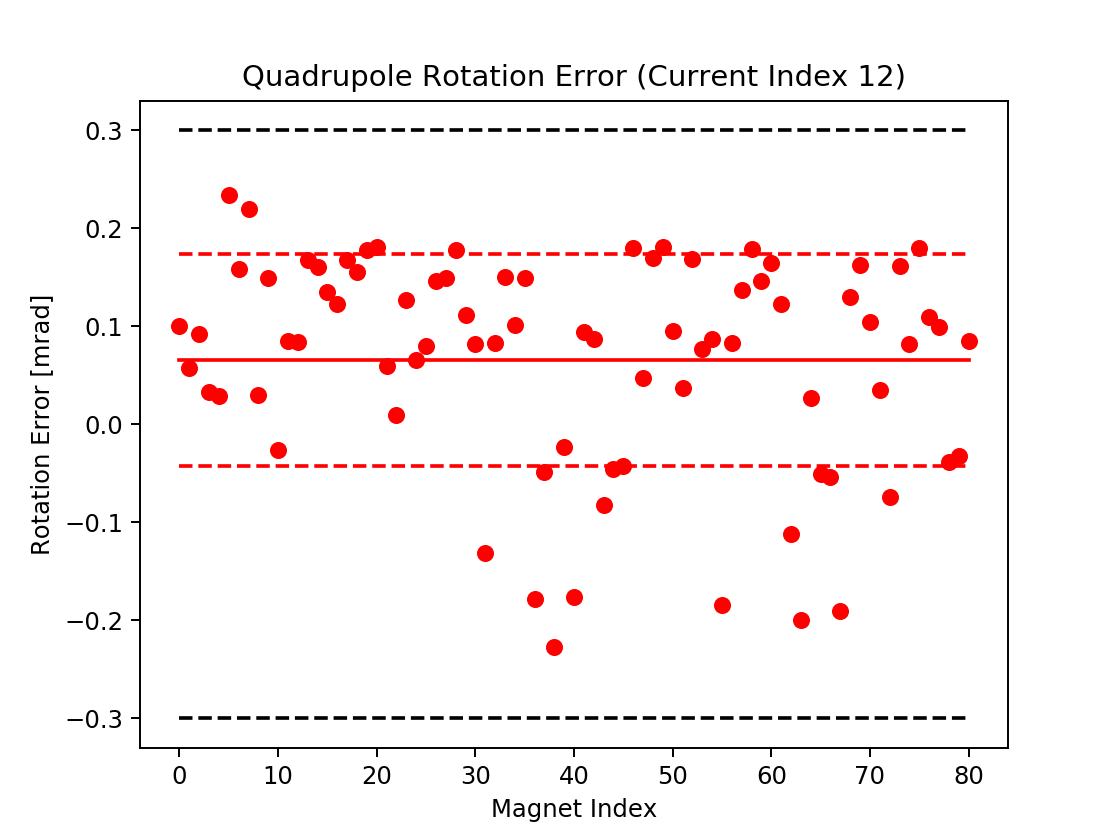

Angle error (Spec): +0.300 mrad
Angle error (Avg) : +0.066 mrad
Angle error (Std) : +0.108 mrad


In [9]:
# Q1, I=95A
curr_idx = 9  
plt.figure()
spec, avg, std = data.rotation_error_plot('M1', plt, curr_idx)
print('Angle error (Spec): {:+.3f} mrad'.format(spec))
print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
print('Angle error (Std) : {:+.3f} mrad'.format(std))

# Q3, I=110A
curr_idx = 10  
plt.figure()
spec, avg, std = data.rotation_error_plot('M1', plt, curr_idx)
print('Angle error (Spec): {:+.3f} mrad'.format(spec))
print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
print('Angle error (Std) : {:+.3f} mrad'.format(std))

# QFA I=121A and Q4 I=134A
curr_idx = 11  
plt.figure()
spec, avg, std = data.rotation_error_plot('M1', plt, curr_idx)
print('Angle error (Spec): {:+.3f} mrad'.format(spec))
print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
print('Angle error (Std) : {:+.3f} mrad'.format(std))

# Q2, I=150A
curr_idx = 12  
plt.figure()
spec, avg, std = data.rotation_error_plot('M1', plt, curr_idx)
print('Angle error (Spec): {:+.3f} mrad'.format(spec))
print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
print('Angle error (Std) : {:+.3f} mrad'.format(std))

## Hysteresis

<IPython.core.display.Javascript object>


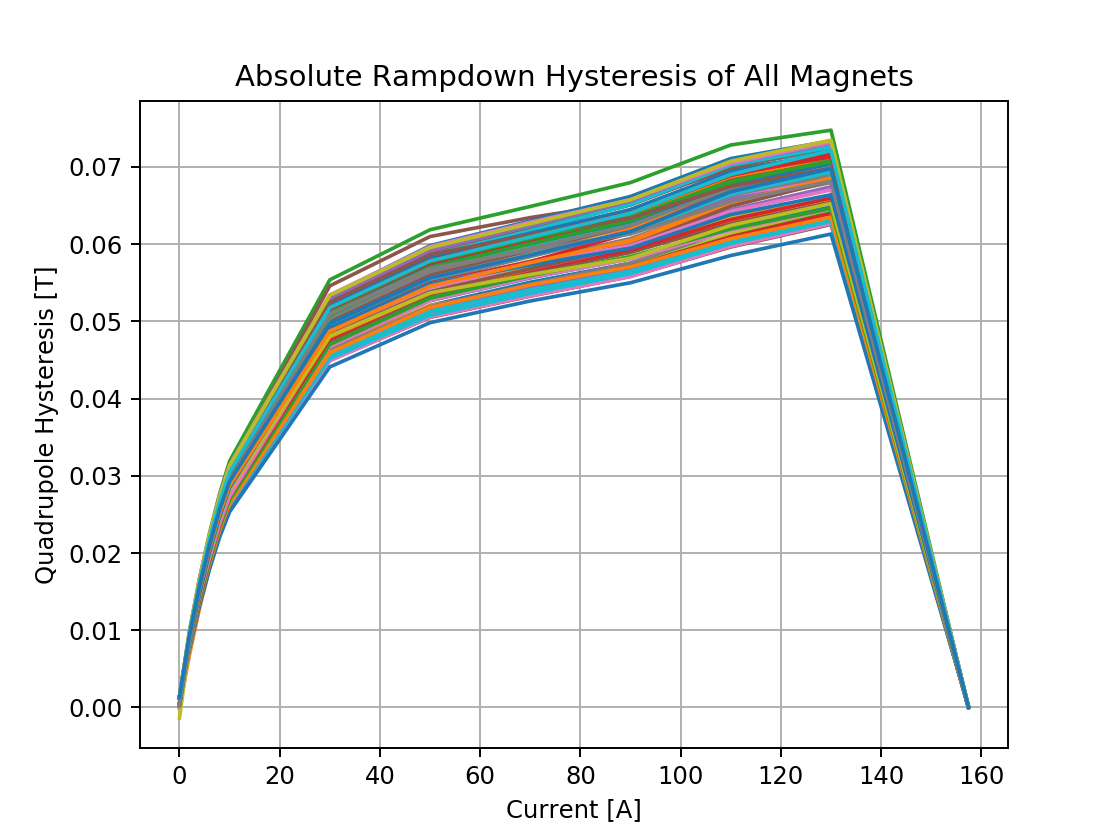

<IPython.core.display.Javascript object>


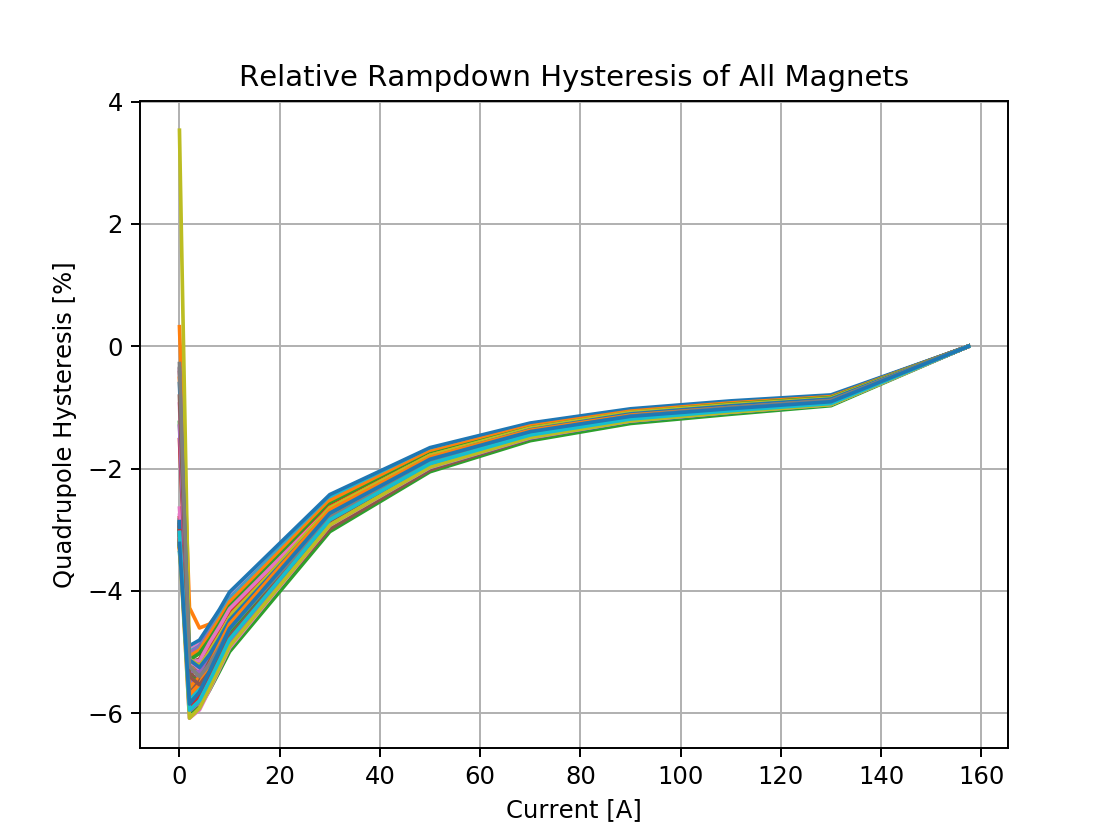

In [10]:
# Absolute
plt.figure()
data.hysteresis_absolute_plot('M1', plt)
plt.show()

# Relative
plt.figure()
data.hysteresis_relative_plot('M1', plt)
plt.show()

## Save Excitation Data Files

In [15]:
# save average excitation data to file

data.save_excdata_average('M1')

In [16]:
# save excitation data of all magnets to separate files
data.save_excdata_individuals('M1')

## Multipoles

<IPython.core.display.Javascript object>


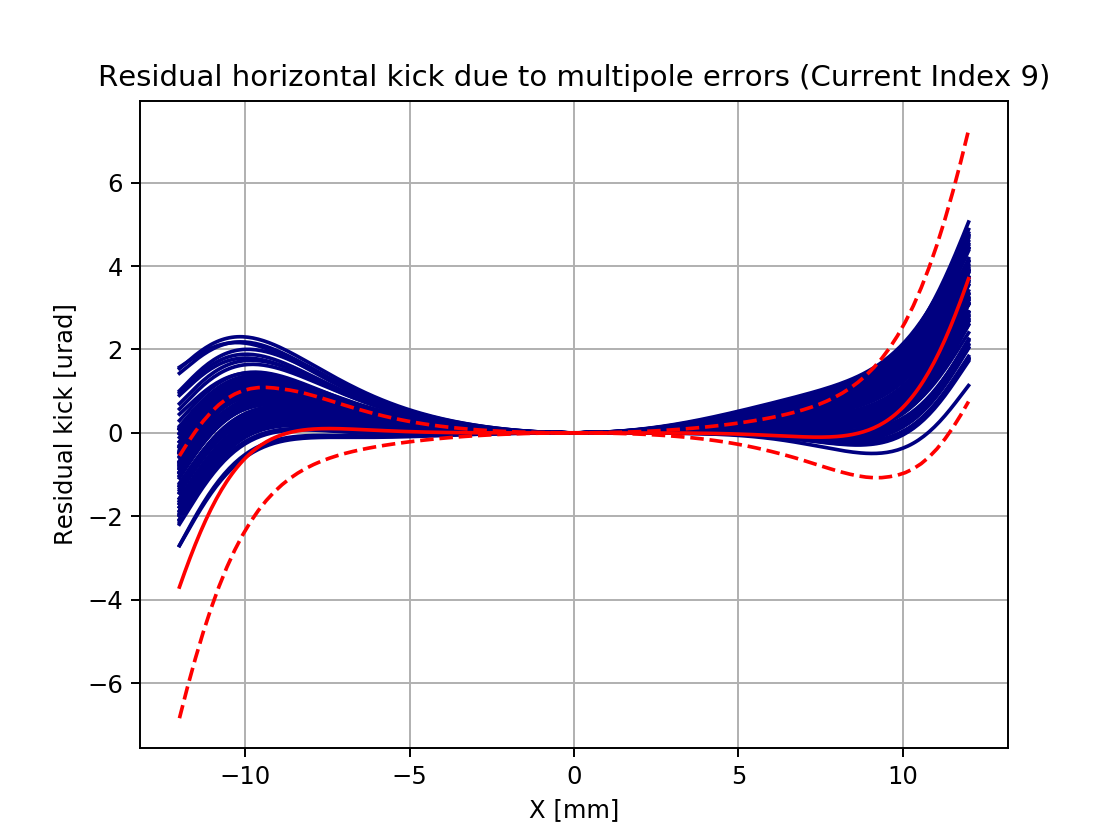

<IPython.core.display.Javascript object>


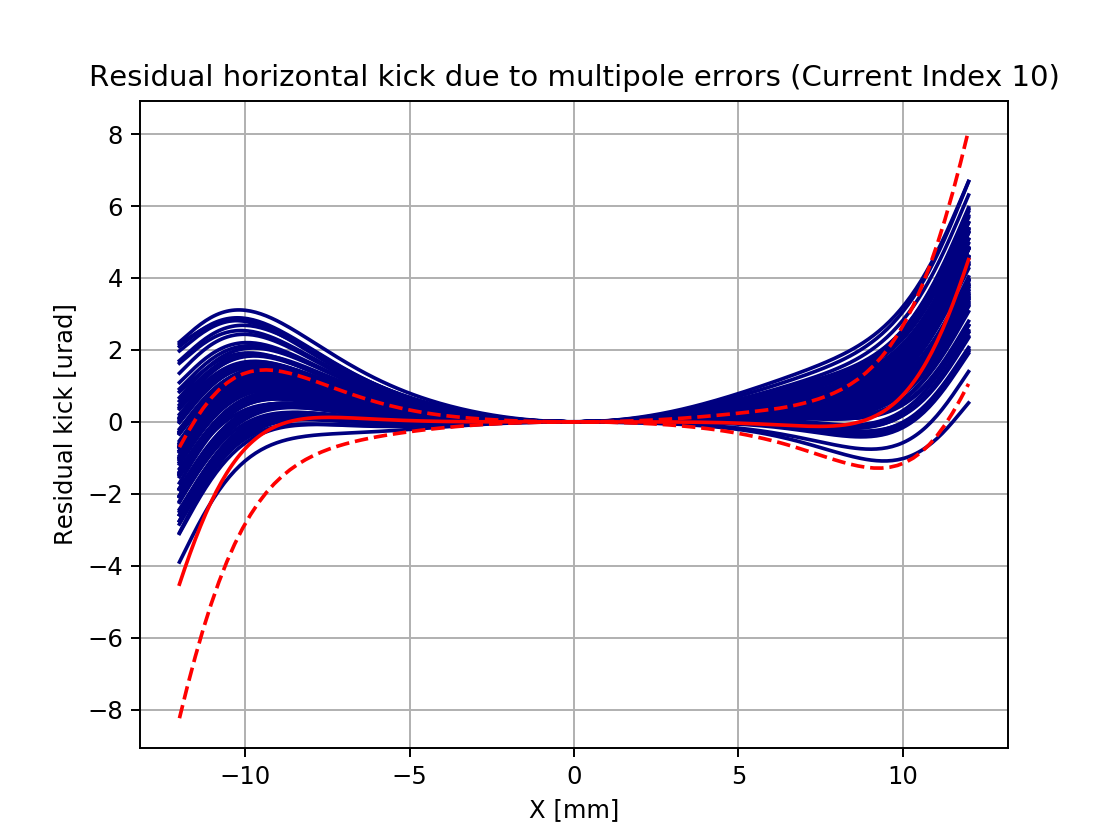

<IPython.core.display.Javascript object>


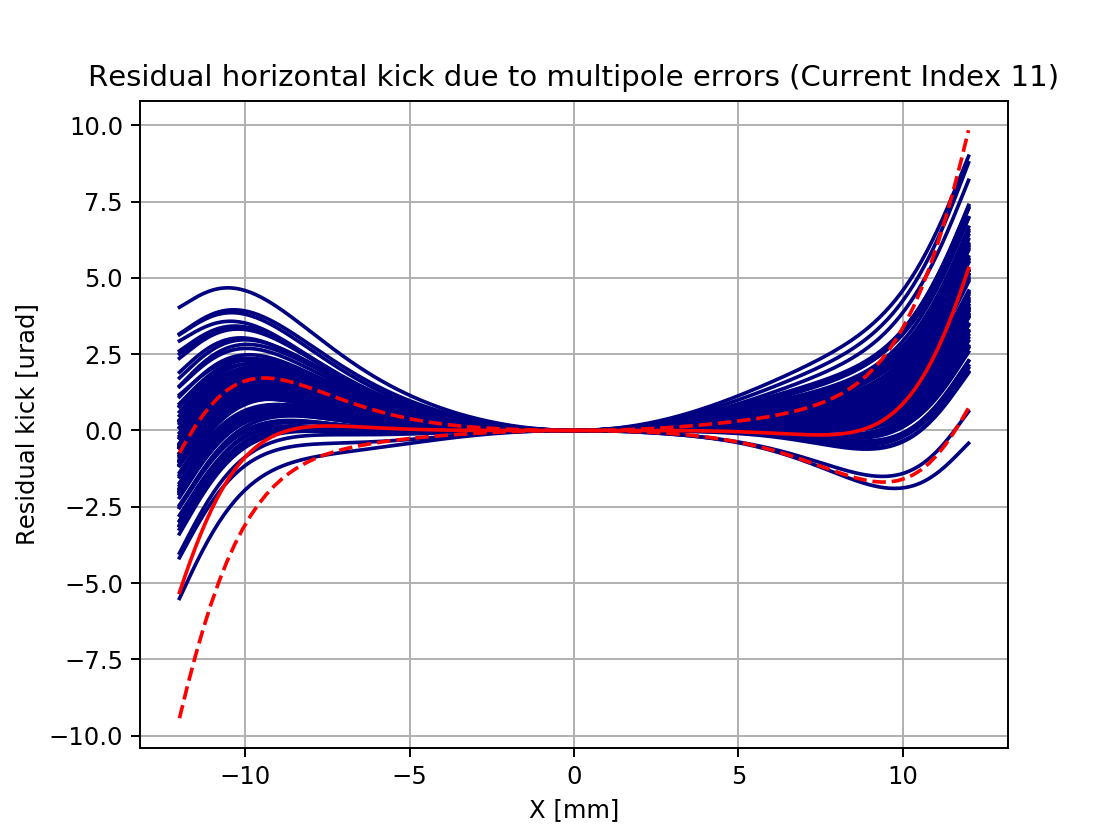

<IPython.core.display.Javascript object>


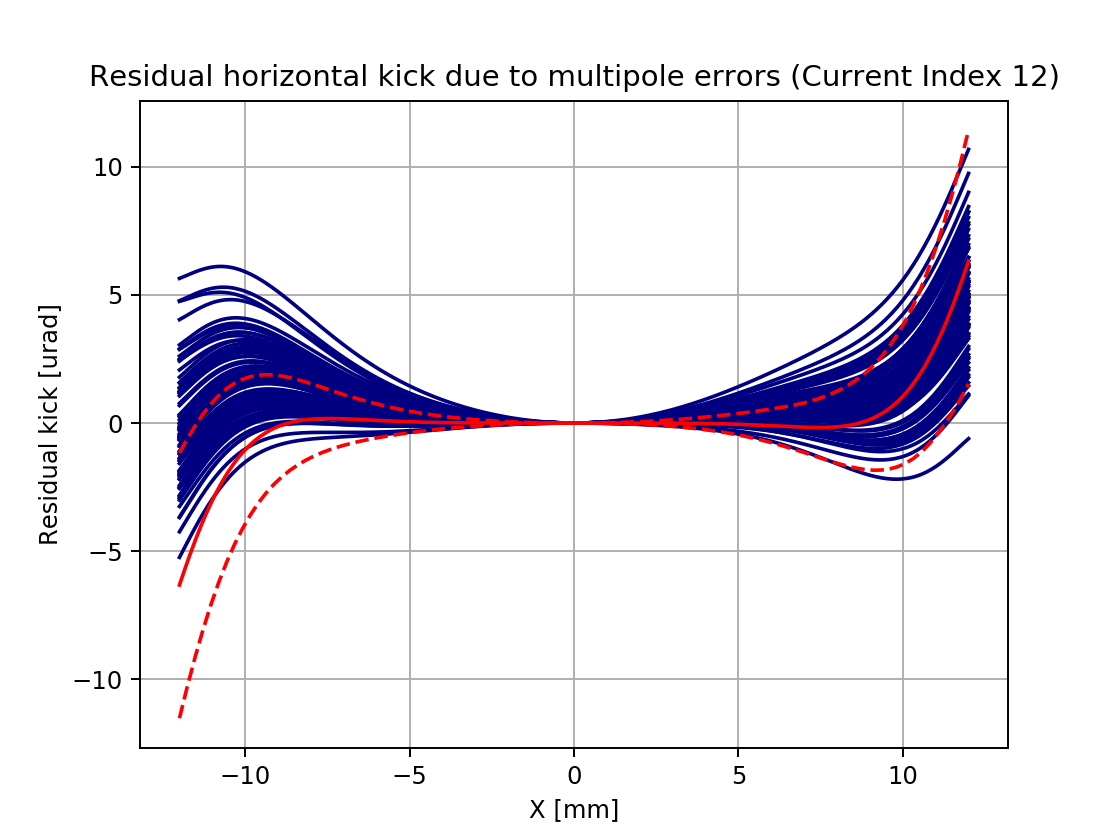

In [11]:
# Horizontal kick

# Q1, I=95A
curr_idx = 9  
plt.figure()
data.multipole_errors_kickx_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# Q2, I=110A
curr_idx = 10  
plt.figure()
data.multipole_errors_kickx_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# QFA, I=121A and Q4 I=134A
curr_idx = 11  
plt.figure()
data.multipole_errors_kickx_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# Q4 I=150A
curr_idx = 12  
plt.figure()
data.multipole_errors_kickx_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

<IPython.core.display.Javascript object>


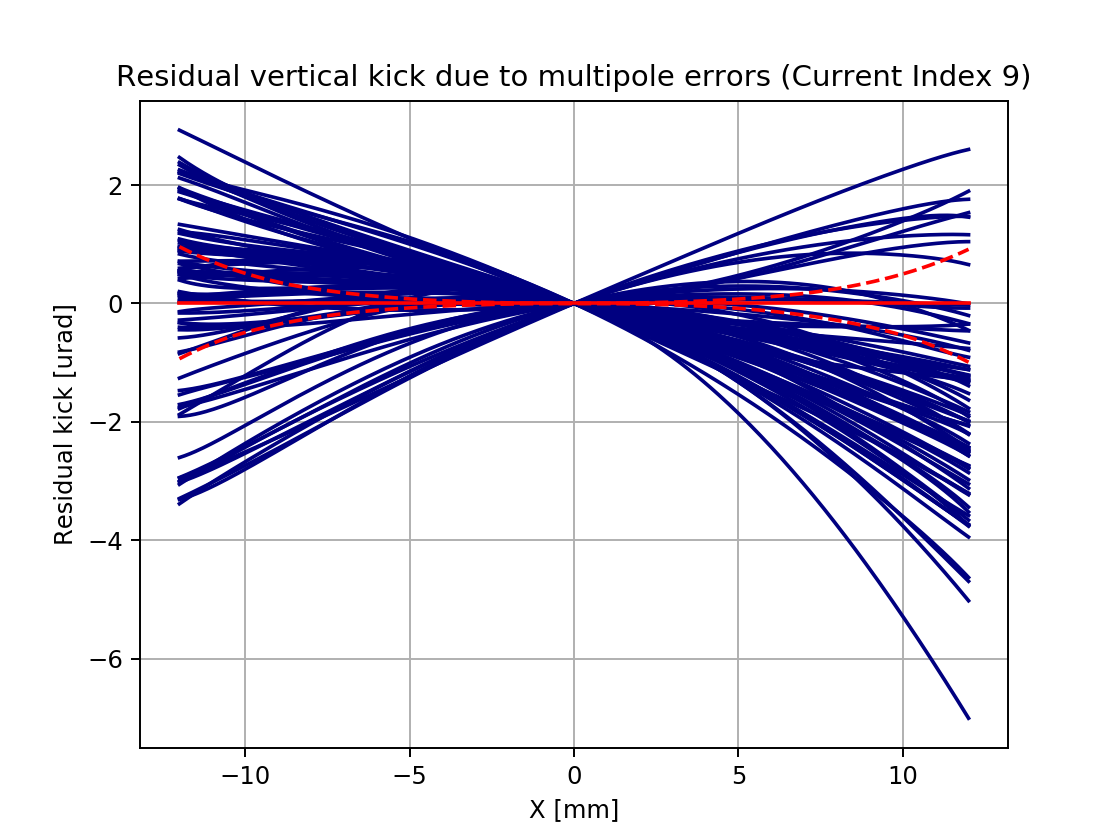

<IPython.core.display.Javascript object>


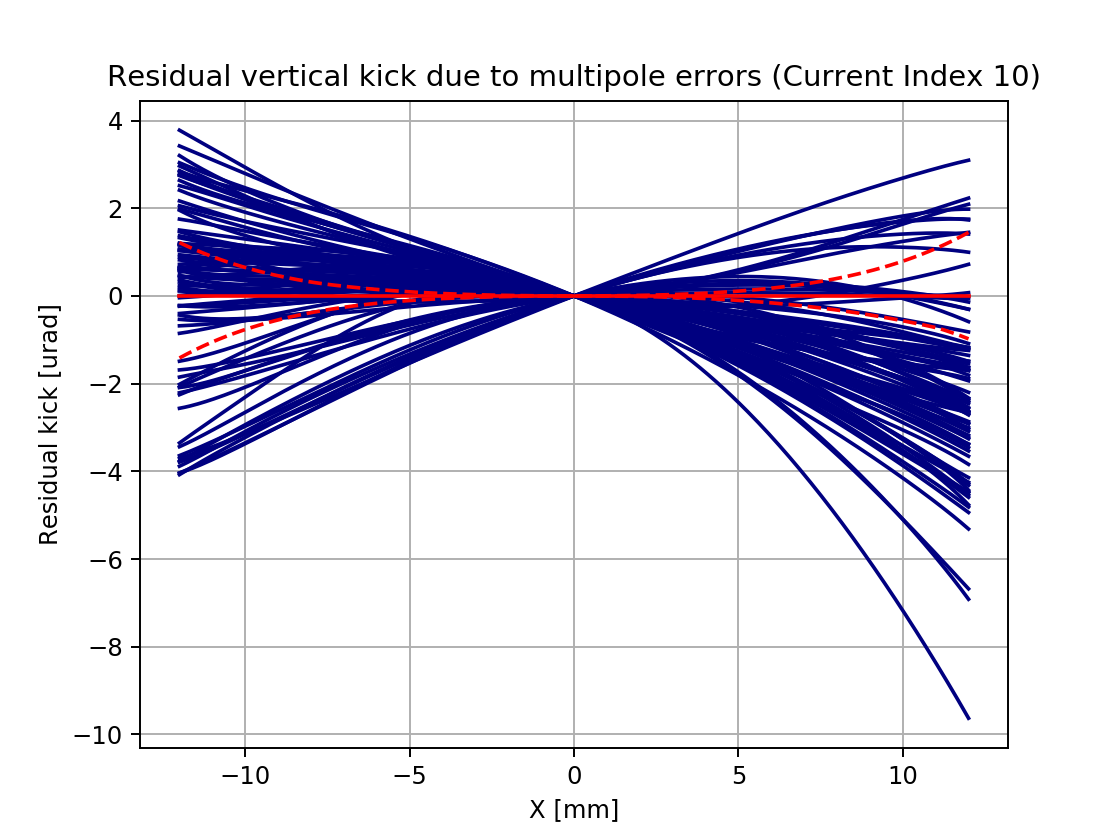

<IPython.core.display.Javascript object>


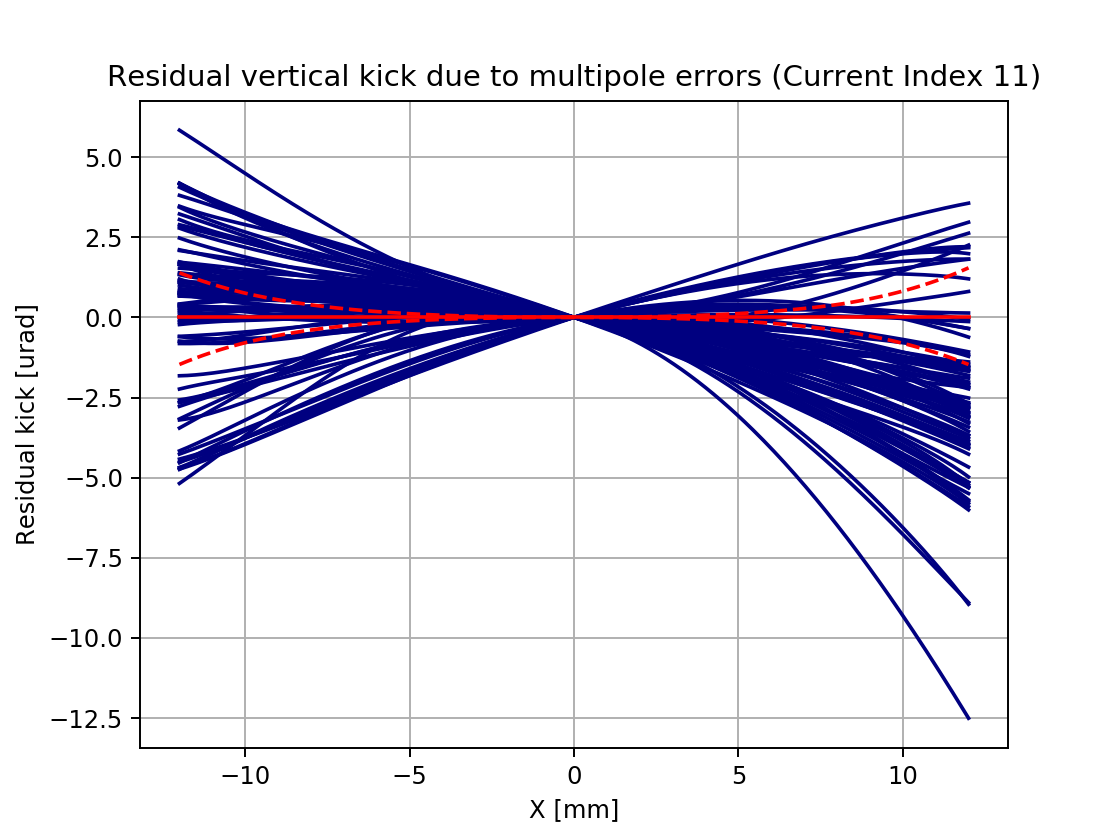

<IPython.core.display.Javascript object>


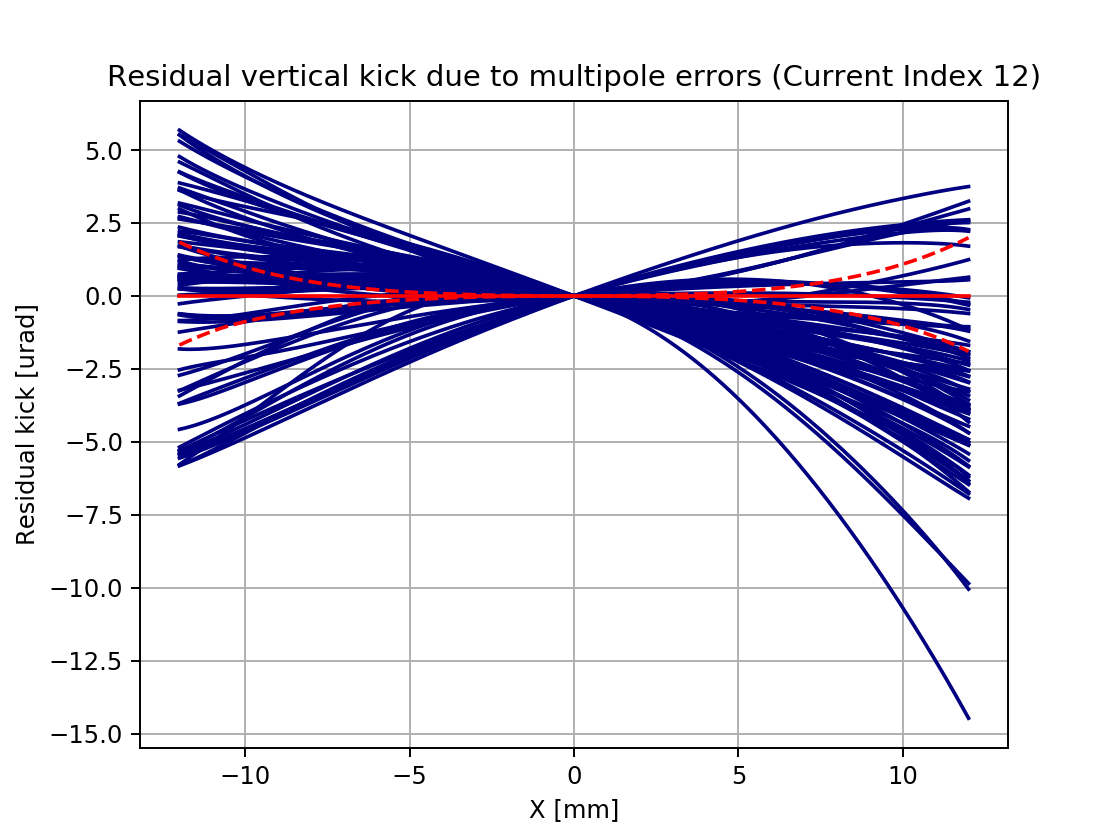

In [12]:
# Vertical kick

# Q1, I=95A
curr_idx = 9  
plt.figure()
data.multipole_errors_kicky_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# Q2, I=110A
curr_idx = 10  
plt.figure()
data.multipole_errors_kicky_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# QFA, I=121A and Q4 I=134A
curr_idx = 11  
plt.figure()
data.multipole_errors_kicky_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# Q4 I=150A
curr_idx = 12  
plt.figure()
data.multipole_errors_kicky_plot('M1', plt, curr_idx=curr_idx, energy=3.0)
plt.show()

# Magnets Sorting

In [13]:
med = 'M1'
print('Rampup')
c, gl = data.tmpl.get_rampup(med)
for i in range(len(c)):
    print('{:02d}: I = {:8.4f} A => GL = {:+.4f} T'.format(i, c[i], gl[i]))

Rampup
00: I =   0.0010 A => GL = -0.0373 T
01: I =   1.9951 A => GL = -0.1491 T
02: I =   3.9979 A => GL = -0.2623 T
03: I =   5.9972 A => GL = -0.3761 T
04: I =   7.9962 A => GL = -0.4905 T
05: I =   9.9962 A => GL = -0.6055 T
06: I =  29.9960 A => GL = -1.7746 T
07: I =  49.9947 A => GL = -2.9577 T
08: I =  69.9952 A => GL = -4.1429 T
09: I =  89.9986 A => GL = -5.3250 T
10: I = 109.9971 A => GL = -6.4970 T
11: I = 129.9962 A => GL = -7.6492 T
12: I = 157.4380 A => GL = -9.1067 T


In [14]:
# Print README Files

currents, _ = data.tmpl.get_rampup('M1')
stdout = sys.stdout
for cidx in range(1,len(currents)):
    sys.stdout = open('README-FAM2_3-{:.0f}A.md'.format(currents[cidx]), 'w')
    data.readme_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout

In [15]:
# Print Multipoles Files

currents, _ = data.tmpl.get_rampup('M1')
stdout = sys.stdout
for cidx in range(1,len(currents)):
    sys.stdout = open('MULTIPOLES-FAM2_3-{:.0f}A.txt'.format(currents[cidx]), 'w')
    data.readme_multipoles_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout